# Création d'un dataset d'ordre de lecture sur PubLayNet

In [1]:
# !pip install Unidecode
# !pip install fuzzysearch

# !pip install elementpath
# !pip install lxml 
# !pip install graphviz
# !pip install pydotplus

In [2]:
!ls ../../../edspdf-train/data/publaynet/

dev.json			test	       train	       xmls
oa_file_list.ARTgjjvC.csv.part	test_urls.txt  train_urls.txt  xmls-bis


In [1]:
import sys
sys.path.append('../')
import os
from pathlib import Path
import json
from sort_xml import *
import numpy as np
import pickle as pk

from edspdf import Pipeline
from edspdf.structures import Box, PDFDoc


base_dir = '../../../edspdf-train/data/publaynet/'

%load_ext autoreload
%autoreload 2

sys.executable

'/export/home/smbaye/edspdf-train/.venv/bin/python'

### Load pdf and xml names and info

In [6]:
!ls ../../../edspdf-train/data/publaynet/train/PMC1277864

ehp0113-000192.nxml  ehp0113-000192f1.gif
ehp0113-000192.pdf   ehp0113-000192f1.jpg


In [2]:
xmls_dir = base_dir + 'train/'
dev_path = base_dir + 'dev.json'

with open(Path(dev_path)) as f:
    samples = json.load(f)

# load xml files
xmls_names = {} # {pmc = {xml_fname, pdf_fname}}
for root, directories, files in os.walk(xmls_dir):
    for pmc in directories:
        fdir = xmls_dir + pmc
        for root2, directories2, files2 in os.walk(fdir):
            xml_fname = None
            pdfs_fnames = []
            for file in files2:
                if file.split('.')[-1] == 'nxml':
                    xml_fname = file
                if file.split('.')[-1] == 'pdf':
                    pdfs_fnames.append(file)

            lenghts = [len(pf) for pf in pdfs_fnames]
            # if len(lenghts) == 0:
            #   print(f'fdir ==> {fdir}')

            i_min = np.argmin(lenghts)
            xmls_names[pmc] = {'xml' :xml_fname, 'pdf': pdfs_fnames[i_min], 'page_num': None}
    break
# end load xml files
    
    
for image in samples['images']:
    pmc = image['file_name'].split('_')[0]
    if pmc in xmls_names:
        page_num = int(image['file_name'].split('_')[1].split('.')[0])
        xmls_names[pmc]['page_num'] = page_num


ValueError: attempt to get argmin of an empty sequence

In [ ]:
print(f'Nb pmc {len(xmls_names)}')
for k,v in xmls_names.items():
    print(f'k: {k} -> v: {v}')
    break

In [3]:
# model
model = Pipeline()
model.add_pipe("pdfminer-extractor", config=dict(extract_style="true"), name="extractor")

In [ ]:
import subprocess
import re

# Commande à exécuter
command = 'ls ../../../edspdf-train/data/publaynet/train'  # Cette commande liste les fichiers dans le répertoire courant (sur Unix/Linux/Mac)

# Exécution de la commande
process = subprocess.run(command, shell=True, capture_output=True, text=True, encoding='utf-8', errors='ignore')

# Récupération et affichage de la sortie
pmcs = process.stdout
pmcs = re.sub(r'\x1b\[.*?m', '', pmcs).splitlines()

print("Standard Output:")
n1, n2 = 100, 200
print(pmcs[n1:n2])
print(len(pmcs[n1:n2]))

OK 1-100

In [10]:
# OK 1-44

# PMC2706804  -->  98/100 (last time)
# PMC2631470  -->  45/100
for it,pmc in enumerate(pmcs[n1:n2]):
    print(f'\n------------------------\n{pmc}  -->  {1+it}/{len(pmcs[n1:n2])}')
    pmc_dir = xmls_dir + pmc

    pmc_data, (doc,tree), (front_nodes, body_nodes, table_nodes) = match_pdf_xml_2_json(pmc_dir, model, v=True)

    # save pk
    pk_path = pmc_dir + '/' + 'pmc_data.pkl'
    with open(pk_path, 'wb') as file:
        pk.dump(pmc_data, file)


------------------------
PMC1343590  -->  1/100
table 0 nodes 8/9
table 1 nodes 8/9
table 2 nodes 20/22
body nodes 51/59
front nodes 5/7

------------------------
PMC1367823  -->  2/100
table 0 nodes 15/17
table 1 nodes 6/8
table 2 nodes 12/12
body nodes 38/40
front nodes 4/5

------------------------
PMC1367839  -->  3/100
table 0 nodes 21/21
table 1 nodes 12/12
table 2 nodes 15/15
table 3 nodes 15/15
body nodes 18/19
front nodes 3/5

------------------------
PMC1368967  -->  4/100
table 0 nodes 9/9
table 1 nodes 8/8
table 2 nodes 6/7
table 3 nodes 8/8
table 4 nodes 12/15
body nodes 39/47
front nodes 6/8

------------------------
PMC1368992  -->  5/100
table 0 nodes 5/5
table 1 nodes 14/14
body nodes 33/36
front nodes 6/8

------------------------
PMC1456987  -->  6/100
table 0 nodes 8/8
table 1 nodes 19/19
table 2 nodes 13/13
table 3 nodes 16/16
body nodes 38/51
front nodes 6/8

------------------------
PMC1459108  -->  7/100
table 0 nodes 10/10
table 1 nodes 9/10
table 2 nodes 10/1

KeyboardInterrupt: 

In [14]:
# OK 46-100

# PMC2631470  -->  45/100
for it,pmc in enumerate(pmcs[n1+45:n2]):
    print(f'\n------------------------\n{pmc}  -->  {1+it+45}/{len(pmcs[n1:n2])}')
    pmc_dir = xmls_dir + pmc

    pmc_data, (doc,tree), (front_nodes, body_nodes, table_nodes) = match_pdf_xml_2_json(pmc_dir, model, v=True)

    # save pk
    pk_path = pmc_dir + '/' + 'pmc_data.pkl'
    with open(pk_path, 'wb') as file:
        pk.dump(pmc_data, file)


------------------------
PMC2639536  -->  46/100
body nodes 29/30
front nodes 5/7

------------------------
PMC2642764  -->  47/100
table 0 nodes 10/13
body nodes 32/35
front nodes 4/8

------------------------
PMC2642765  -->  48/100
table 0 nodes 7/10
body nodes 26/29
front nodes 5/7

------------------------
PMC2644323  -->  49/100
table 0 nodes 13/13
table 1 nodes 16/16
table 2 nodes 19/19
table 3 nodes 19/19
table 4 nodes 19/19
table 5 nodes 11/11
body nodes 24/36
front nodes 6/8

------------------------
PMC2644490  -->  50/100
body nodes 28/34
front nodes 4/6

------------------------
PMC2644491  -->  51/100
body nodes 65/66
front nodes 4/6

------------------------
PMC2644492  -->  52/100
body nodes 41/44
front nodes 4/6

------------------------
PMC2644493  -->  53/100
table 0 nodes 5/5
body nodes 44/61
front nodes 4/6

------------------------
PMC2644494  -->  54/100
body nodes 37/39
front nodes 4/6

------------------------
PMC2644495  -->  55/100
table 0 nodes 13/13
body n

In [15]:
# OK 45

# PMC2631470  -->  45/100
l_it_pmc = [(44, 'PMC2631470')]
for it,pmc in l_it_pmc:
    print(f'\n------------------------\n{pmc}  -->  {1+it}/{len(pmcs[n1:n2])}')
    pmc_dir = xmls_dir + pmc

    pmc_data, (doc,tree), (front_nodes, body_nodes, table_nodes) = match_pdf_xml_2_json(pmc_dir, model, v=True)

    # save pk
    pk_path = pmc_dir + '/' + 'pmc_data.pkl'
    with open(pk_path, 'wb') as file:
        pk.dump(pmc_data, file)


------------------------
PMC2631470  -->  45/100
body nodes 37/39
front nodes 5/7


In [9]:
with open(pk_path, 'rb') as file:
    loaded_pmc_data = pk.load(file)

## Display pdf(show annotation) with the loaded pkl file

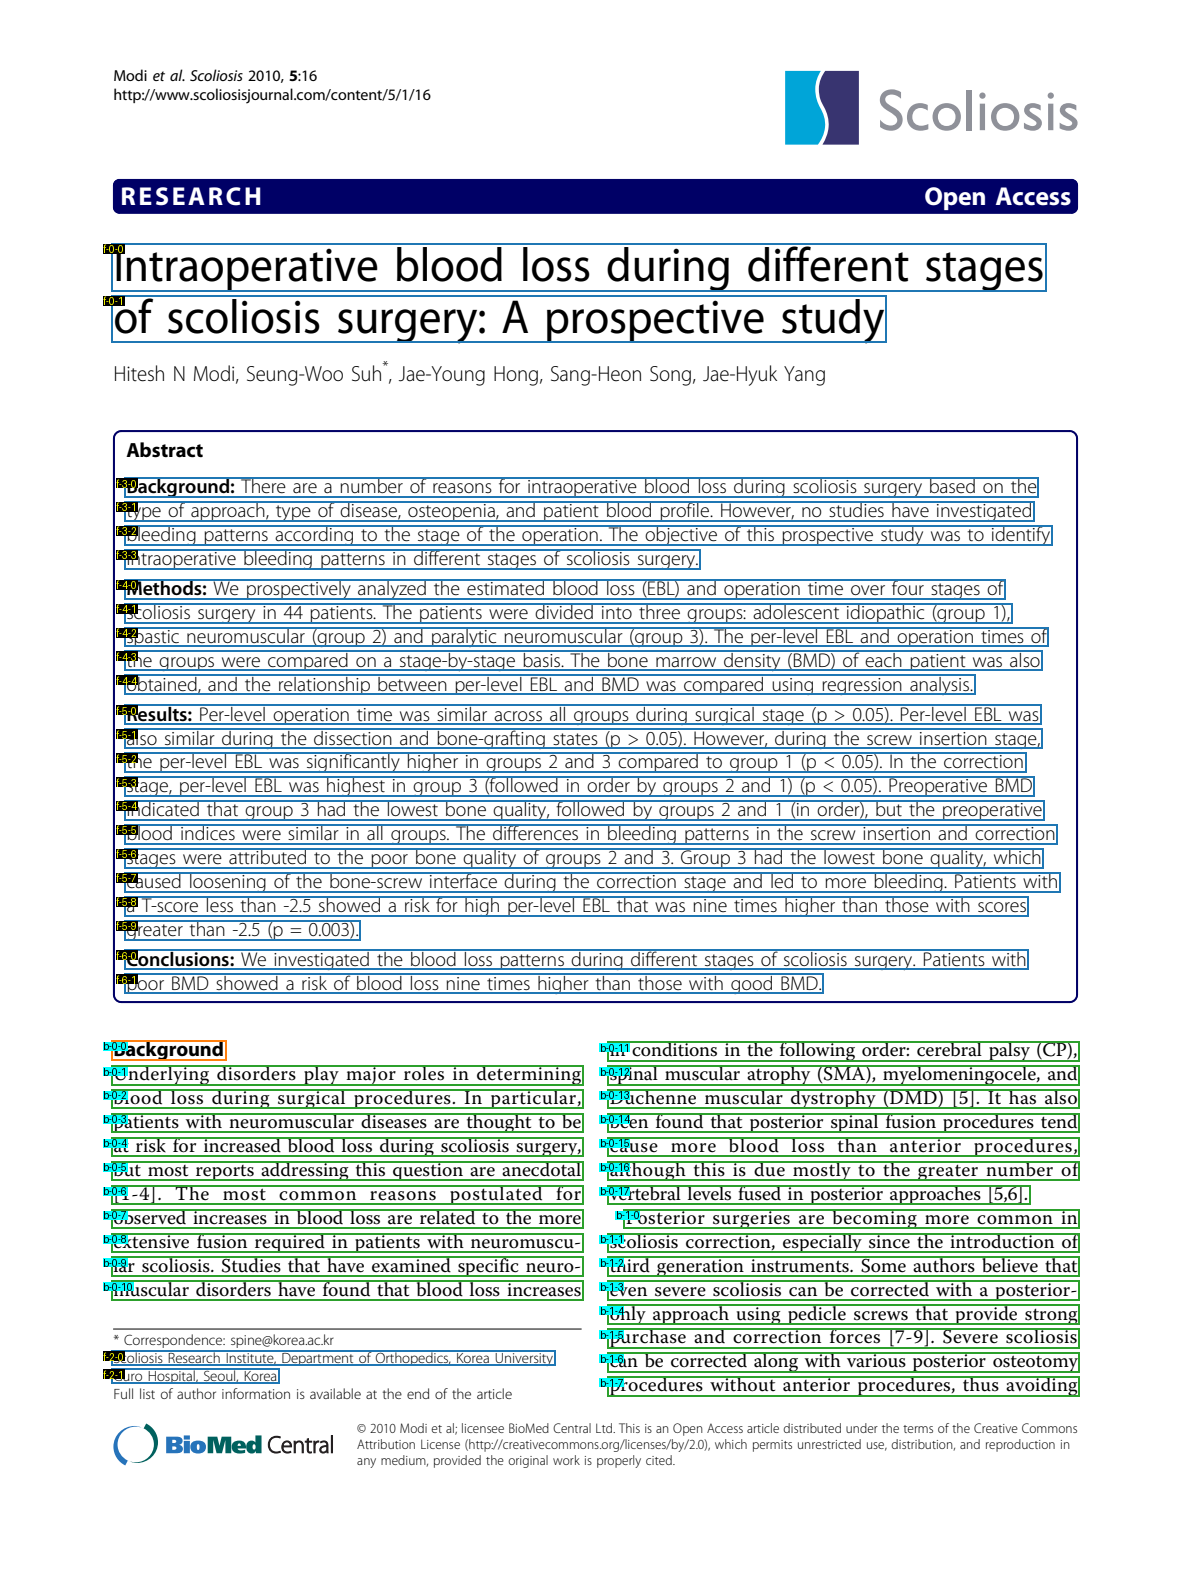

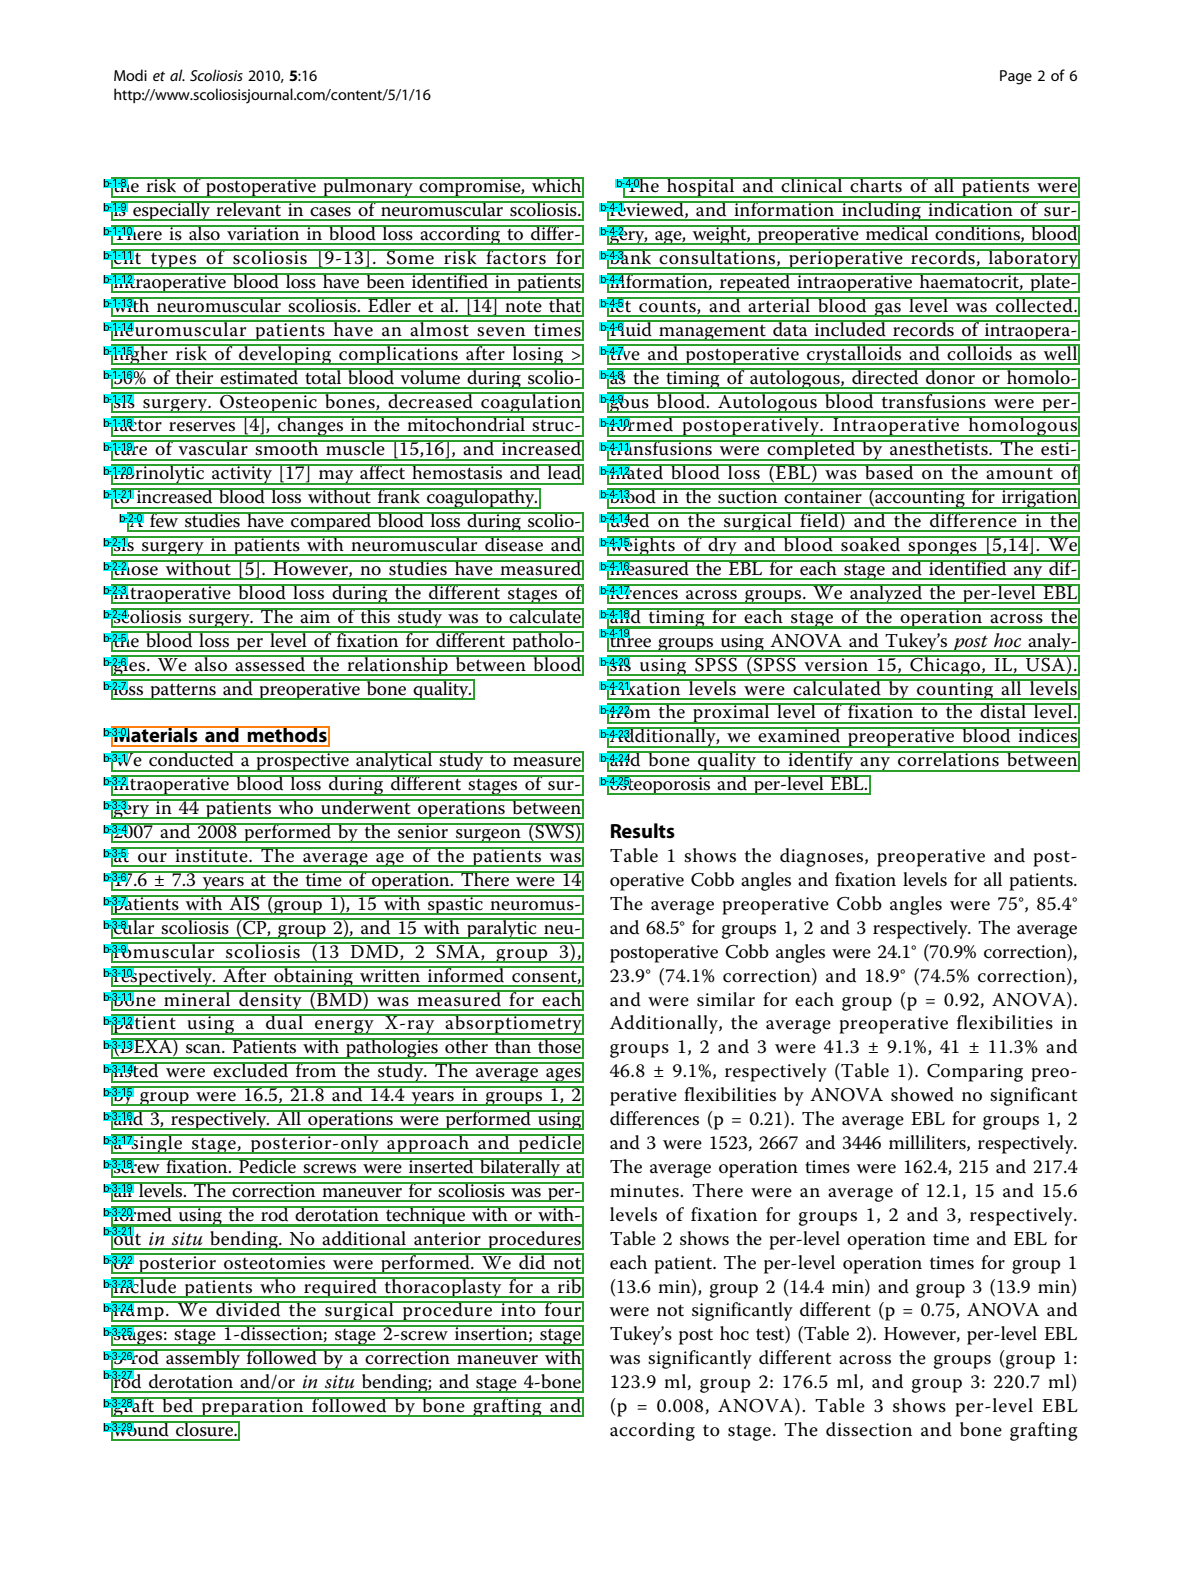

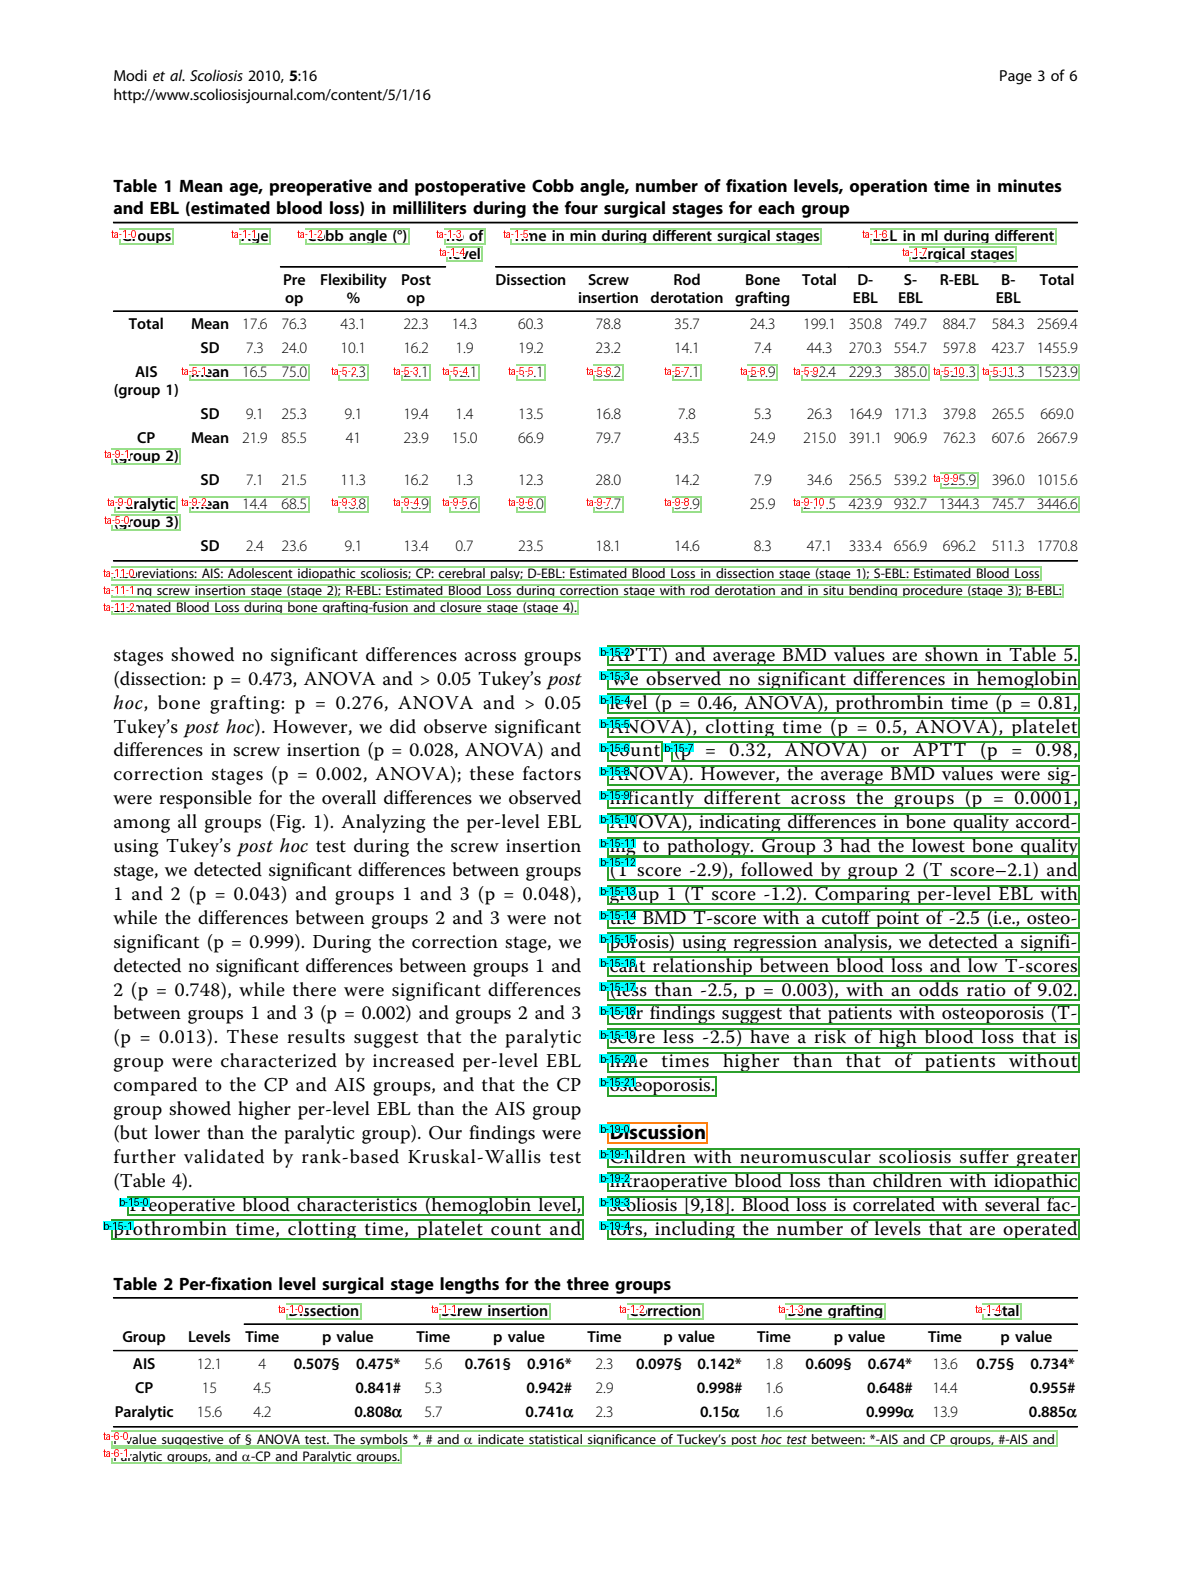

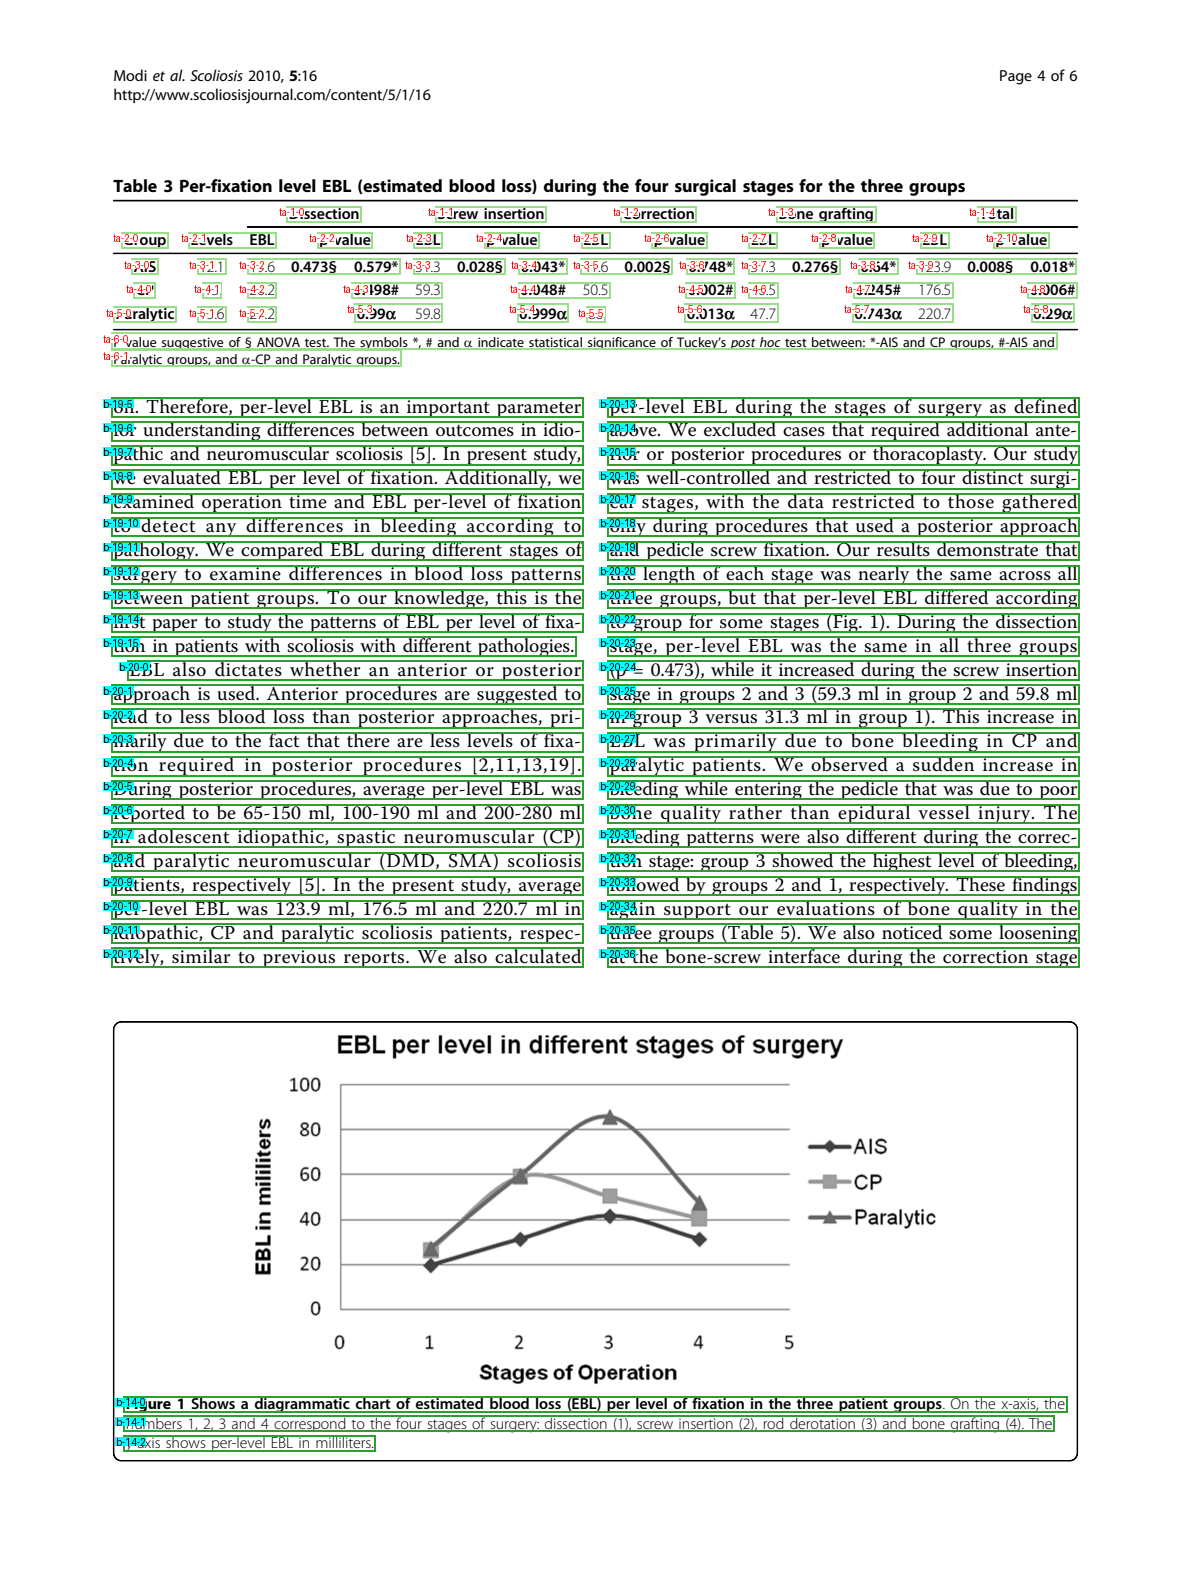

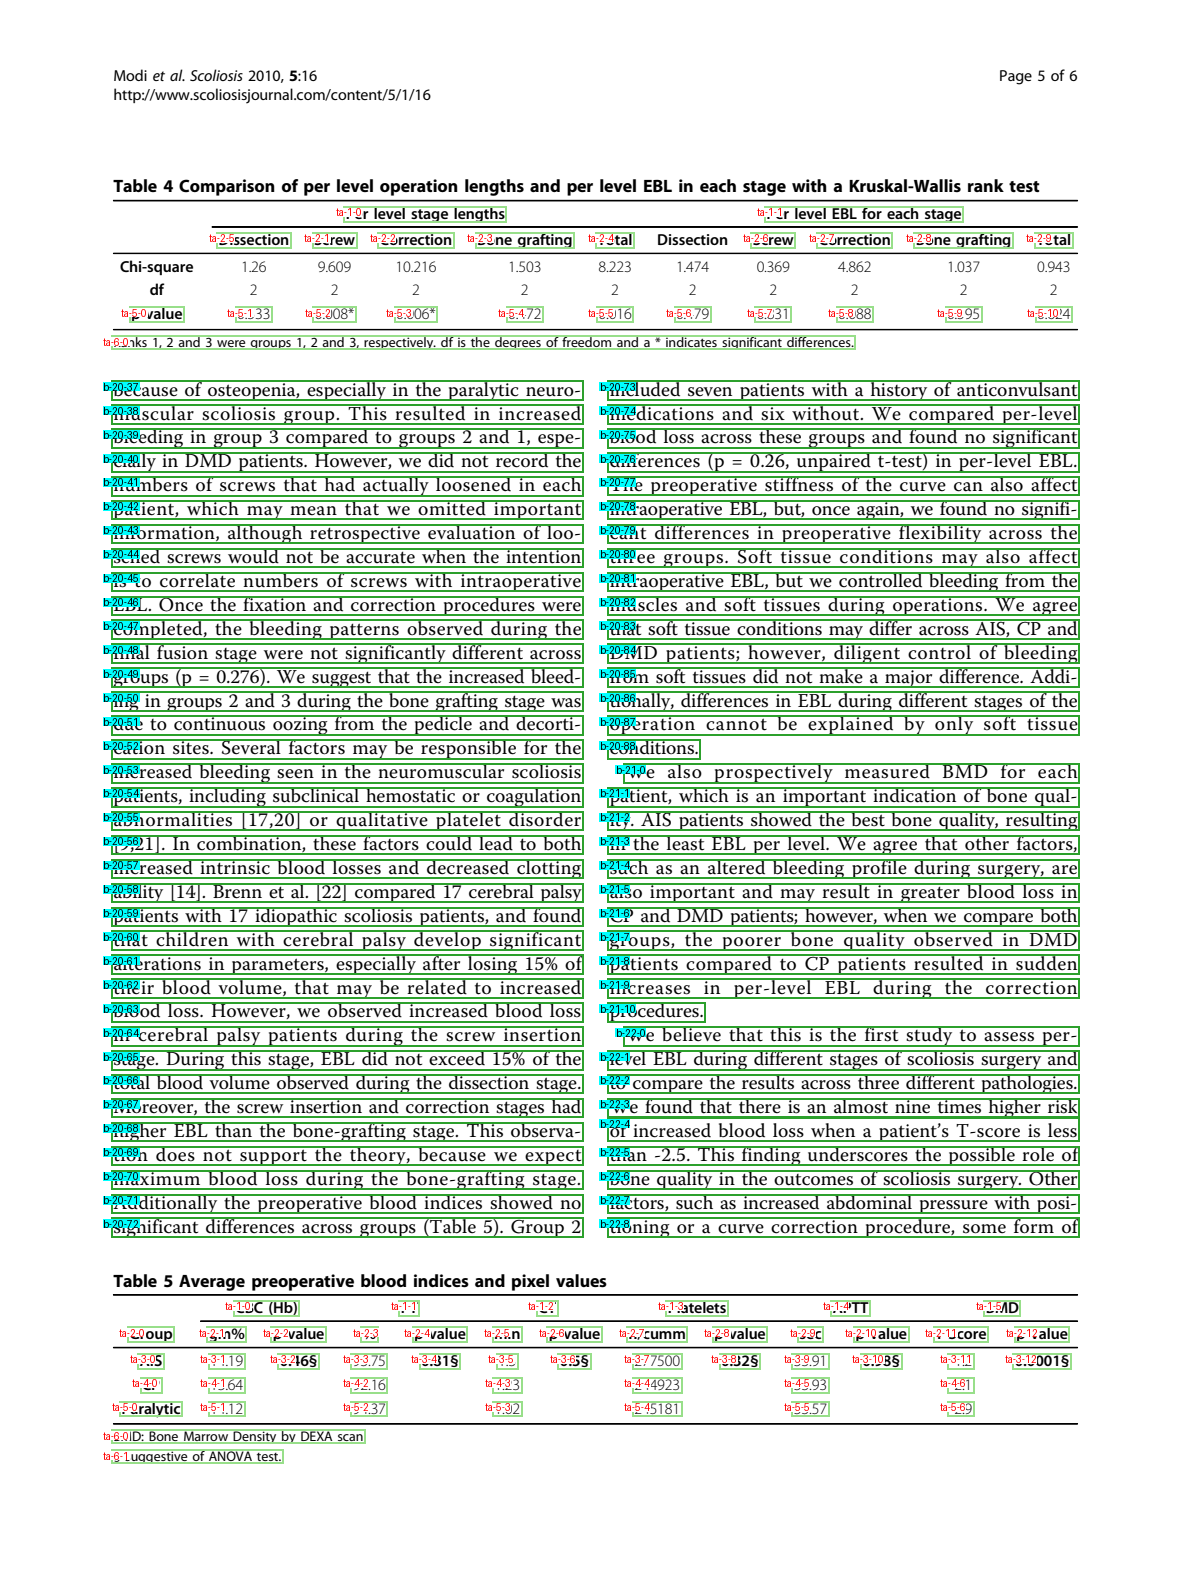

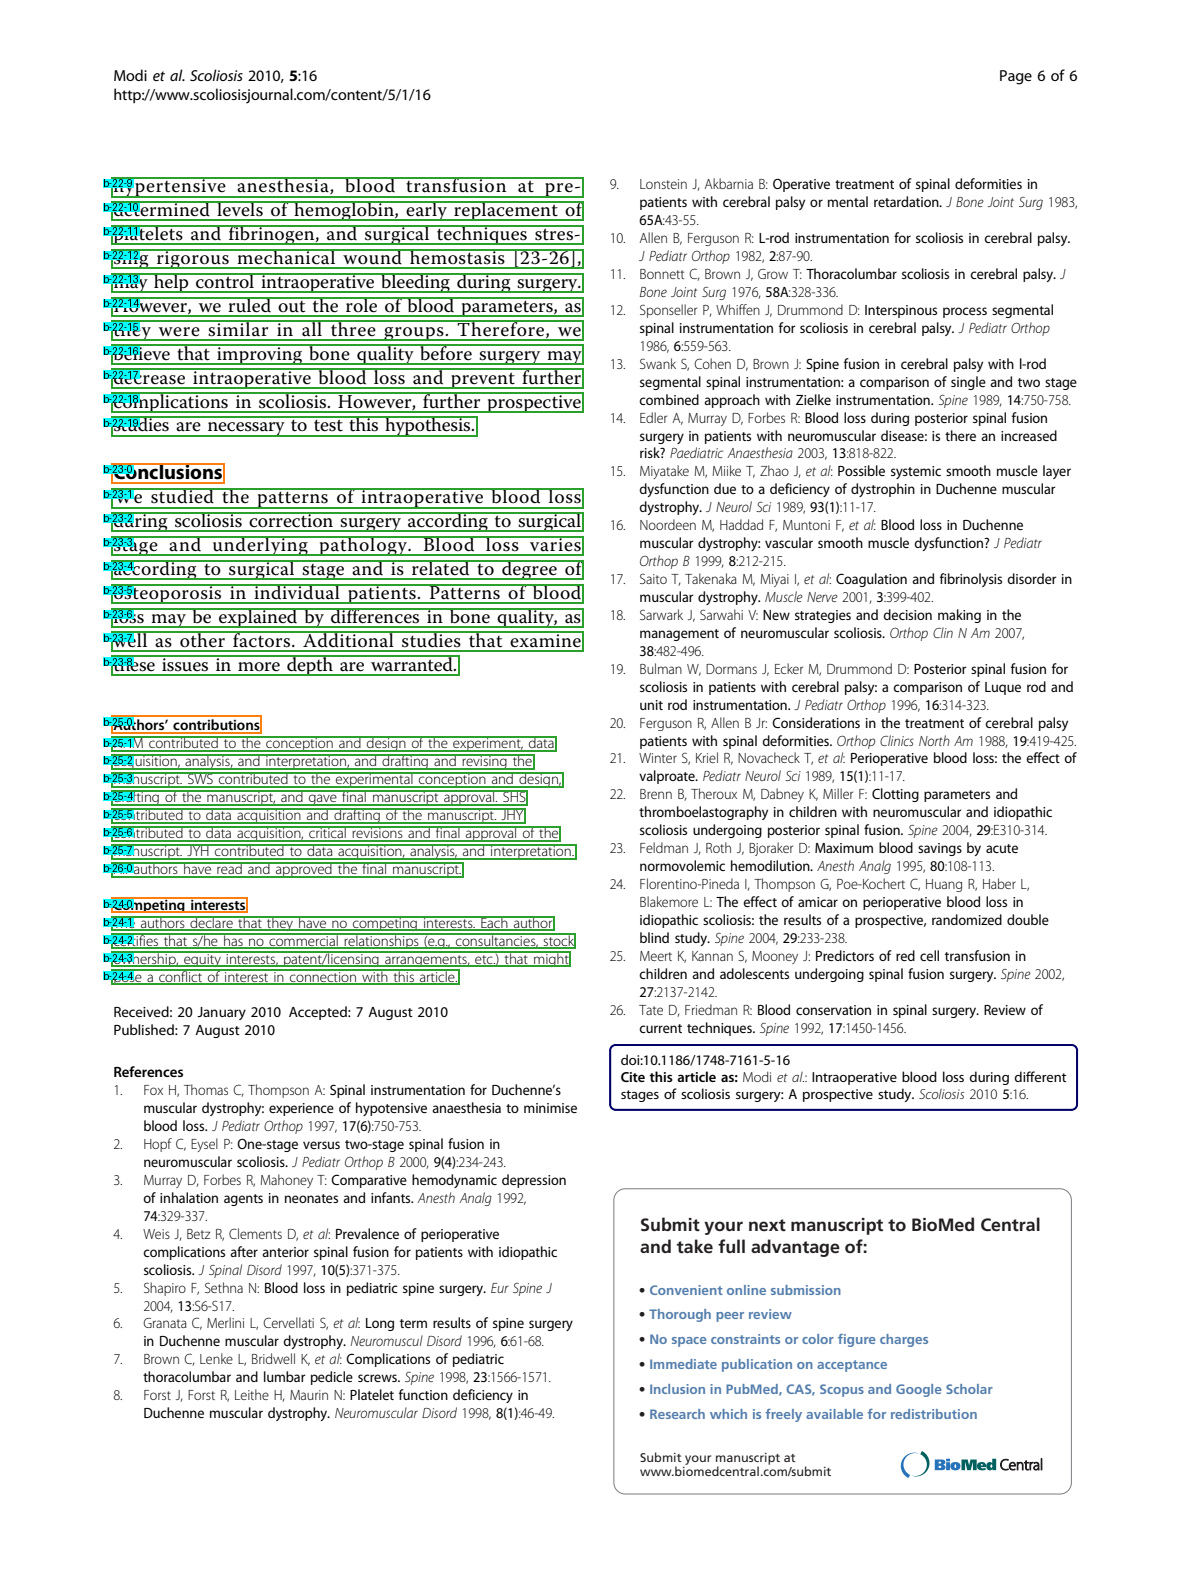

In [21]:
from edspdf.structures import Box, Box_lines, TextBox


xmls_dir = base_dir + 'train/'
pk_path = xmls_dir + 'PMC2924263/pmc_data.pkl'
with open(pk_path, 'rb') as file:
    loaded_pmc_data = pk.load(file)
pdf = Path(loaded_pmc_data['pdf_path']).read_bytes()
doc_2: PDFDoc = model.get_pipe("extractor")(pdf)

content_boxes = []
for li in loaded_pmc_data['front_lines'] + loaded_pmc_data['body_lines'] + loaded_pmc_data['table_lines']:
    _tb = TextBox(
        x0=li['x0'],
        x1=li['x1'],
        y0=li['y0'],
        y1=li['y1'],
        text=li['text'],
        label=li['label'],
        page_num=li['page_num'],
        )
    if li['node_type'] == 'front':
        _tb.rank = f"{li['node_type'][0]}-{li['node_num']}-{li['rank']}"
        _tb.color='yellow'
        _tb.bg_color='black'
    if li['node_type'] == 'body':
        _tb.rank = f"{li['node_type'][0]}-{li['node_num']}-{li['rank']}"
        _tb.color='black'
        _tb.bg_color='cyan'
    if li['node_type'] == 'table':
        _tb.rank = f"{li['node_type'][:2]}-{li['node_num']}-{li['rank']}"
        _tb.color='red'
        _tb.bg_color='white'
    content_boxes.append(_tb)

for page in show_annotations(doc_2.content, content_boxes):
    display(page)